In [15]:
import numpy as np
import math
import pandas as pd
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import accuracy_score, silhouette_score
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

In [2]:
'''
Reading in the data and merging the datasets
'''

'\nReading in the data and merging the datasets\n'

In [3]:
meta = pd.read_json('meta_Video_Games.json.gz',compression = 'gzip', lines = True,encoding = 'utf-8')
reviews = pd.read_json('Video_Games_5.json.gz', nrows = 10000, compression = 'gzip', lines = True, encoding = 'utf-8')
reviews.head(10)

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
0,5,True,"10 17, 2015",A1HP7NVNPFMA4N,0700026657,Ambrosia075,"This game is a bit hard to get the hang of, bu...",but when you do it's great.,1445040000,NaN,NaN,NaN
1,4,False,"07 27, 2015",A1JGAP0185YJI6,0700026657,travis,I played it a while but it was alright. The st...,"But in spite of that it was fun, I liked it",1437955200,NaN,NaN,NaN
2,3,True,"02 23, 2015",A1YJWEXHQBWK2B,0700026657,Vincent G. Mezera,ok game.,Three Stars,1424649600,NaN,NaN,NaN
3,2,True,"02 20, 2015",A2204E1TH211HT,0700026657,Grandma KR,"found the game a bit too complicated, not what...",Two Stars,1424390400,NaN,NaN,NaN
4,5,True,"12 25, 2014",A2RF5B5H74JLPE,0700026657,jon,"great game, I love it and have played it since...",love this game,1419465600,NaN,NaN,NaN
5,4,True,"11 13, 2014",A11V6ZJ2FVQY1D,0700026657,IBRAHIM ALBADI,i liked a lot some time that i haven't play a ...,Anno 2070,1415836800,NaN,NaN,NaN
6,1,False,"08 2, 2014",A1KXJ1ELZIU05C,0700026657,Creation27,"I'm an avid gamer, but Anno 2070 is an INSULT ...",Avoid This Game - Filled with Bugs,1406937600,NaN,NaN,NaN
7,5,True,"03 3, 2014",A1WK5I4874S3O2,0700026657,WhiteSkull,I bought this game thinking it would be pretty...,A very good game balance of skill with depth o...,1393804800,NaN,NaN,NaN
8,5,True,"02 21, 2014",AV969NA4CBP10,0700026657,Travis B. Moore,I have played the old anno 1701 AND 1503. thi...,Anno 2070 more like anno 1701,1392940800,NaN,NaN,NaN
9,4,True,"06 27, 2013",A1EO9BFUHTGWKZ,0700026657,johnnyz3,"I liked it and had fun with it, played for a w...",Pretty fun,1372291200,NaN,NaN,NaN


In [14]:
meta.head()

,category,tech1,description,fit,title,also_buy,tech2,brand,feature,rank,also_view,main_cat,similar_item,date,price,asin,imageURL,imageURLHighRes,details
0,"[Video Games, PC, Games]",,[],,Reversi Sensory Challenger,[],,Fidelity Electronics,[],"[>#2,623,937 in Toys &amp; Games (See Top 100 ...",[],Toys &amp; Games,,,,0042000742,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN
1,"[Video Games, Xbox 360, Games, </span></span><...",,[Brand new sealed!],,Medal of Honor: Warfighter - Includes Battlefi...,[B00PADROYW],,by\n \n EA Games,[],"[>#67,231 in Video Games (See Top 100 in Video...","[B0050SY5BM, B072NQJCW5, B000TI836G, B002SRSQ7...",Video Games,,,"\n\t\t\t\t\t\t\t\t\t\t\t\t<span class=""vertica...",0078764343,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN
2,"[Video Games, Retro Gaming & Microconsoles, Su...",,[],,street fighter 2 II turbo super nintendo snes ...,[],,Nintendo,[],"[>#134,433 in Video Games (See Top 100 in Vide...",[],Video Games,,,$0.72,0276425316,[],[],NaN
3,"[Video Games, Xbox 360, Accessories, Controlle...",,[MAS's Pro Xbox 360 Stick (Perfect 360 Stick) ...,,Xbox 360 MAS STICK,[],,by\n \n MAS SYSTEMS,[Original PCB used from Xbox 360 Control Pad (...,"[>#105,263 in Video Games (See Top 100 in Vide...",[],Video Games,,,,0324411812,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN
4,"[Video Games, PC, Games, </span></span></span>...",,"[Phonics Alive! 3, The Speller teaches student...",,Phonics Alive! 3: The Speller,[],,by\n \n Advanced Software Pty. Ltd.,"[Grades 2-12, Spelling Program, Teaches Spelli...","[>#92,397 in Video Games (See Top 100 in Video...",[B000BCZ7U0],Video Games,,,,0439335310,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN


In [17]:
reviews.head(30)

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
0,5,True,"10 17, 2015",A1HP7NVNPFMA4N,0700026657,Ambrosia075,"This game is a bit hard to get the hang of, bu...",but when you do it's great.,1445040000,NaN,NaN,NaN
1,4,False,"07 27, 2015",A1JGAP0185YJI6,0700026657,travis,I played it a while but it was alright. The st...,"But in spite of that it was fun, I liked it",1437955200,NaN,NaN,NaN
2,3,True,"02 23, 2015",A1YJWEXHQBWK2B,0700026657,Vincent G. Mezera,ok game.,Three Stars,1424649600,NaN,NaN,NaN
3,2,True,"02 20, 2015",A2204E1TH211HT,0700026657,Grandma KR,"found the game a bit too complicated, not what...",Two Stars,1424390400,NaN,NaN,NaN
4,5,True,"12 25, 2014",A2RF5B5H74JLPE,0700026657,jon,"great game, I love it and have played it since...",love this game,1419465600,NaN,NaN,NaN
5,4,True,"11 13, 2014",A11V6ZJ2FVQY1D,0700026657,IBRAHIM ALBADI,i liked a lot some time that i haven't play a ...,Anno 2070,1415836800,NaN,NaN,NaN
6,1,False,"08 2, 2014",A1KXJ1ELZIU05C,0700026657,Creation27,"I'm an avid gamer, but Anno 2070 is an INSULT ...",Avoid This Game - Filled with Bugs,1406937600,NaN,NaN,NaN
7,5,True,"03 3, 2014",A1WK5I4874S3O2,0700026657,WhiteSkull,I bought this game thinking it would be pretty...,A very good game balance of skill with depth o...,1393804800,NaN,NaN,NaN
8,5,True,"02 21, 2014",AV969NA4CBP10,0700026657,Travis B. Moore,I have played the old anno 1701 AND 1503. thi...,Anno 2070 more like anno 1701,1392940800,NaN,NaN,NaN
9,4,True,"06 27, 2013",A1EO9BFUHTGWKZ,0700026657,johnnyz3,"I liked it and had fun with it, played for a w...",Pretty fun,1372291200,NaN,NaN,NaN


In [4]:
review_df = reviews.pivot_table(index = 'reviewerID', columns = 'asin', values = 'overall').fillna(0)
review_df.shape

(4863, 628)

In [ ]:
'''
SVD/COSINE_SIMILARITY IMPLEMENTATION
'''

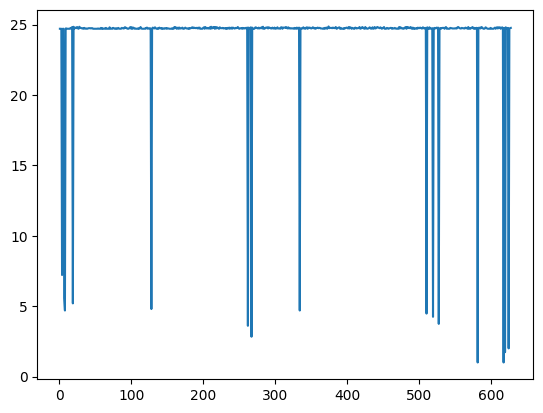

In [12]:
U, S, Vh = np.linalg.svd(review_df, full_matrices = False)
sim = []
for i in range(1, Vh.shape[1]):
    j = cosine_similarity(Vh[:,0].reshape(-1,1), Vh[:,i].reshape(-1,1))
    sim.append(np.linalg.norm(j))
plt.plot(range(1,Vh.shape[1]), sim)
plt.show()

In [ ]:
'''
It seems like doing cosine similarity for user-based does not work because there are a greater number of users in comparison to products
'''

In [ ]:
'''
NEAREST NEIGHBORHOOD IMPLEMENTATION
'''

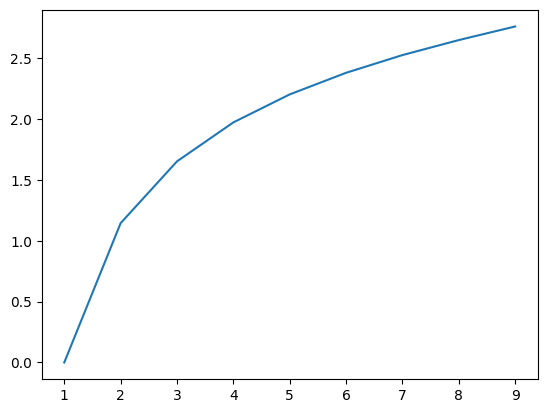

In [7]:
distances = []
for i in range(1,10):
    nn = NearestNeighbors(n_neighbors = i, algorithm='auto')
    nn.fit(review_df)
    dist, ind = nn.kneighbors(review_df)
    distances.append(dist.mean())
plt.plot(range(1,10), distances)
plt.show()

In [ ]:
'''
SPECTRAL CLUSTERING IMPLEMENTATION
'''

In [16]:
silhouette = []
for i in range(1,10):
    spectral = SpectralClustering(n_clusters = i, assign_labels = 'discretize', random_state=42)
    labels = spectral.fit_predict(review_df)
    silhouette.append(silhouette_score(review_df, labels))
plt.plot(range(1,10), silhouette)
plt.show()

c:\users\sean\miniconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


KeyboardInterrupt: 

In [ ]:
'''
KMEANS IMPLEMENTATION
'''

c:\users\sean\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\users\sean\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\users\sean\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\users\sean\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\users\sean\miniconda3\lib\site-packages\sklearn\clust

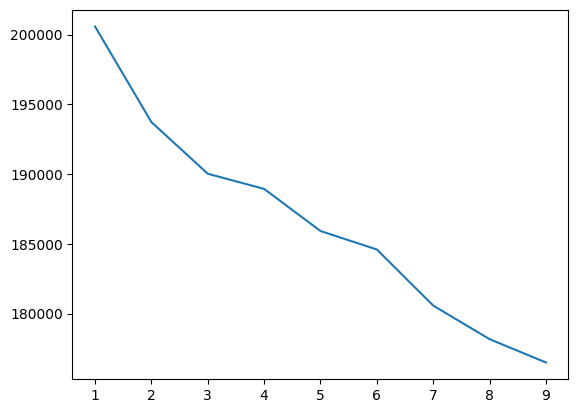

In [11]:
inert = []
for i in range(1,10):
    kmean = KMeans(n_clusters = i, random_state = 42)
    kmean.fit(review_df)
    inert.append(kmean.inertia_)
    
plt.plot(range(1,10), inert)
plt.show()